In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import  pyplot as plt 

In [57]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\HartAttack DataSet\dataset\Medicaldataset.csv")
df.sample(2)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
855,65,1,67,177,105,120.0,3.68,0.011,negative
222,55,1,122,147,95,96.0,3.86,0.005,negative


In [58]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [61]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [62]:
df['Result']= le.fit_transform(df['Result'])

df['Result'].unique()

array([0, 1])

In [63]:
df.sample(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
885,60,0,67,130,80,216.0,5.85,0.030,1
741,29,1,76,157,93,228.0,300.00,0.003,1
614,52,1,86,113,68,282.0,12.20,0.005,1
48,46,1,77,153,76,96.0,1.33,0.009,0
202,48,0,65,136,88,104.0,4.55,0.011,0


In [64]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [65]:
print(df.isnull().sum())

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


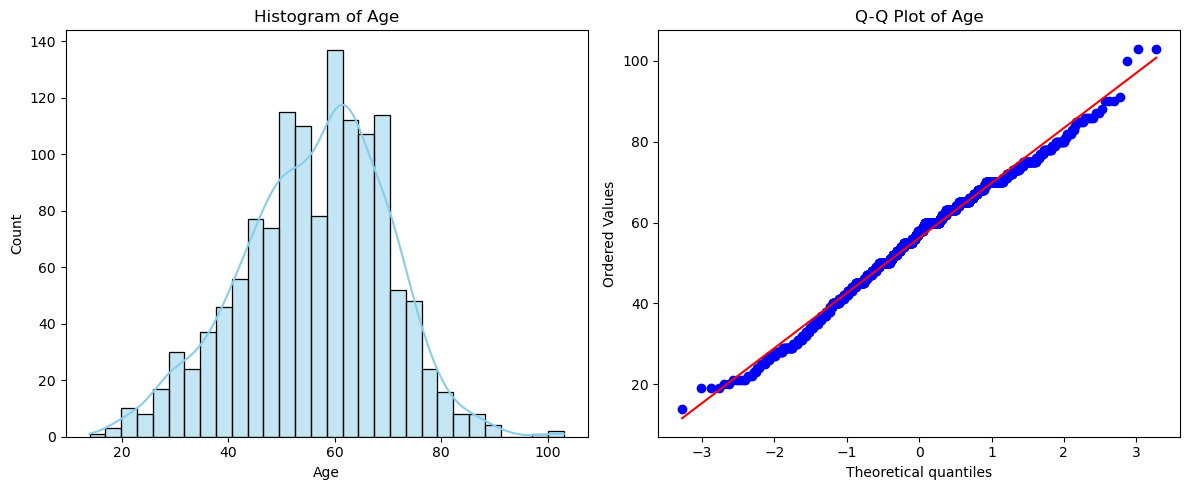

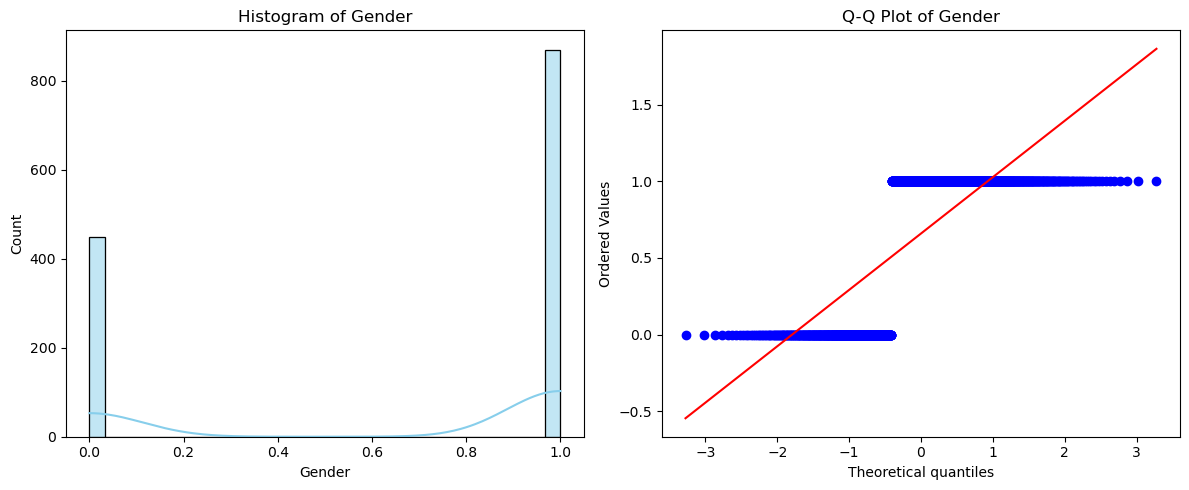

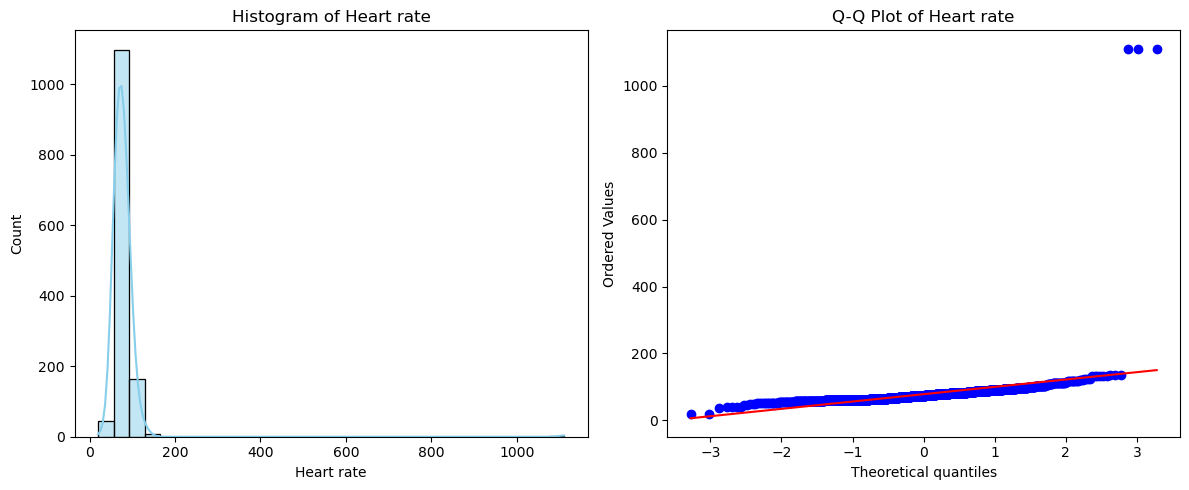

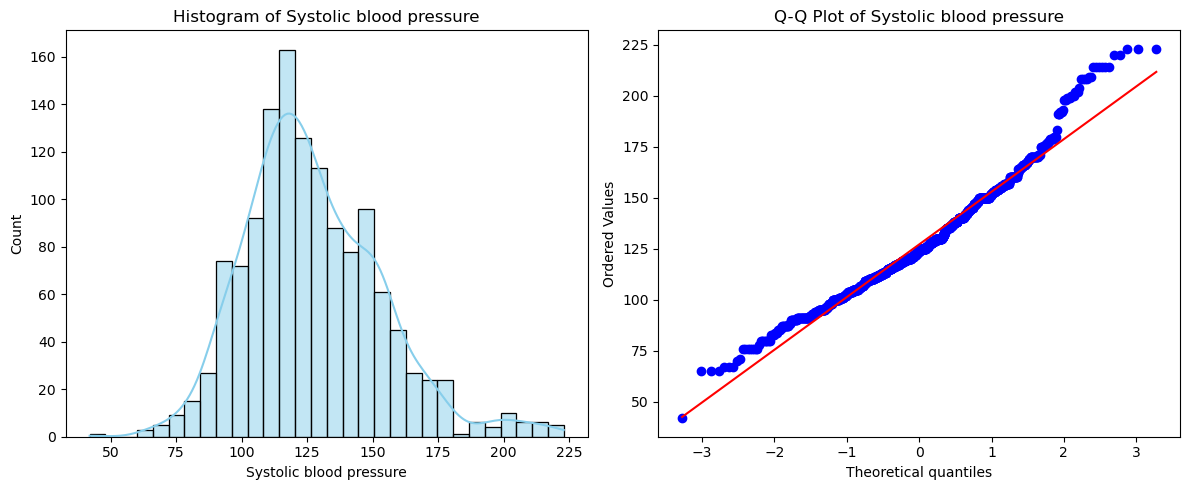

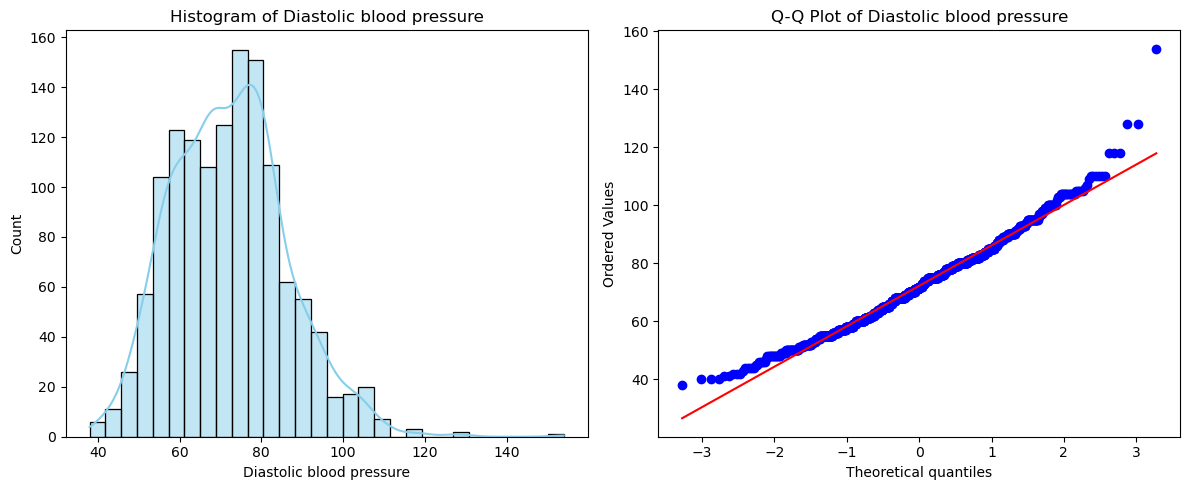

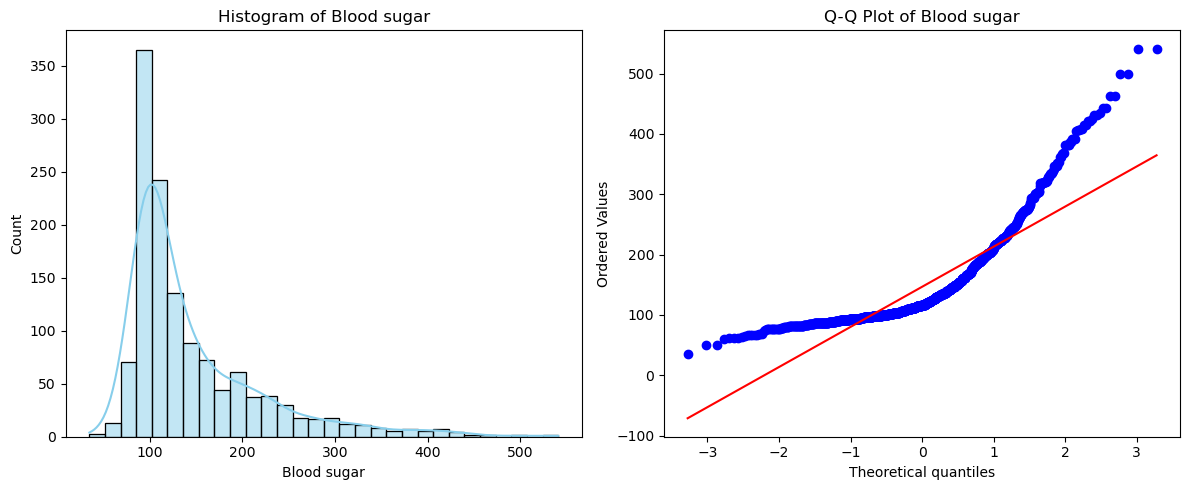

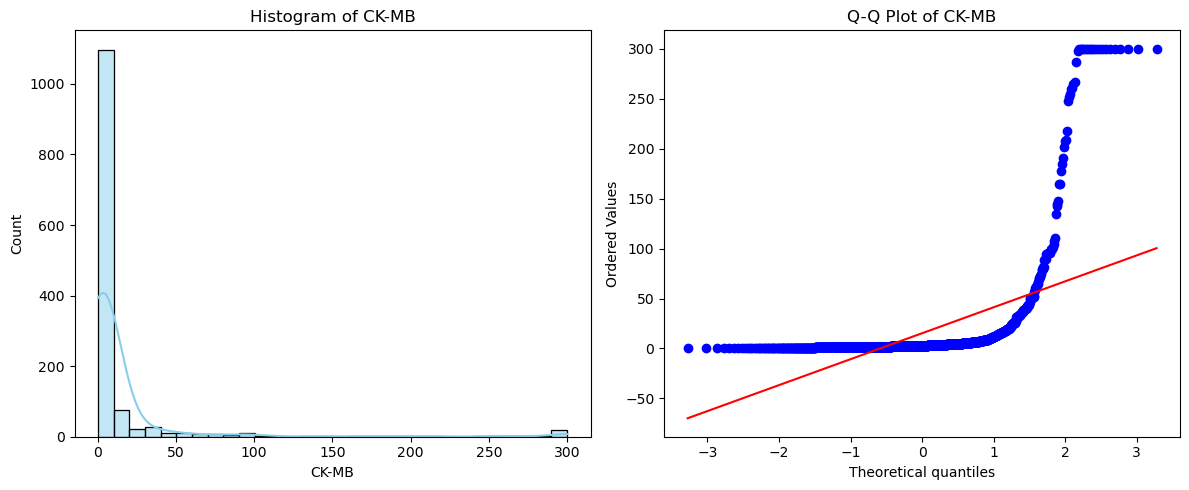

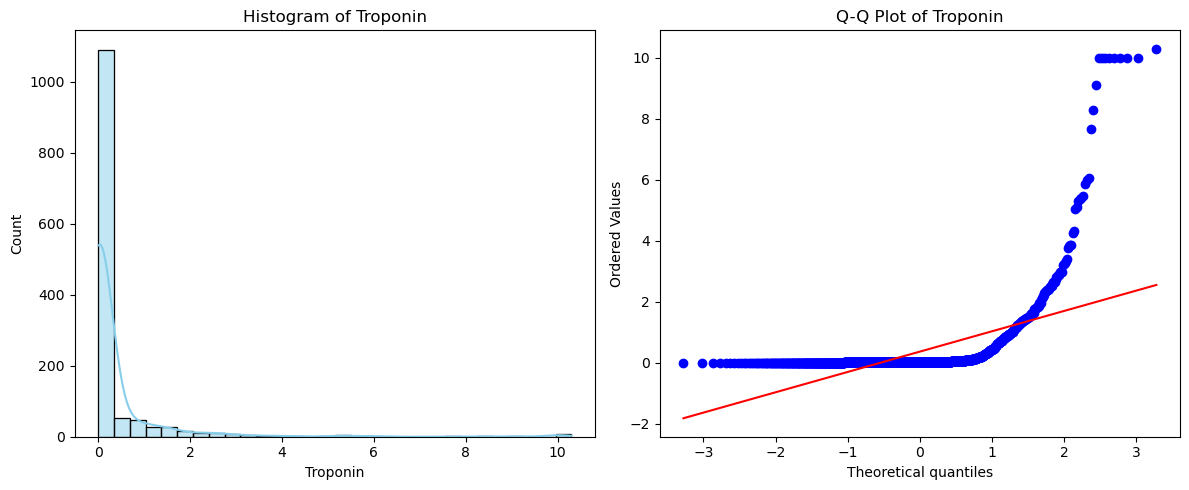

In [66]:
from scipy import stats
# Get numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram and QQ plot side by side
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

In [67]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

In [68]:
X = df.drop(columns='Result')
y=df['Result']

In [69]:
X_train,X_test ,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

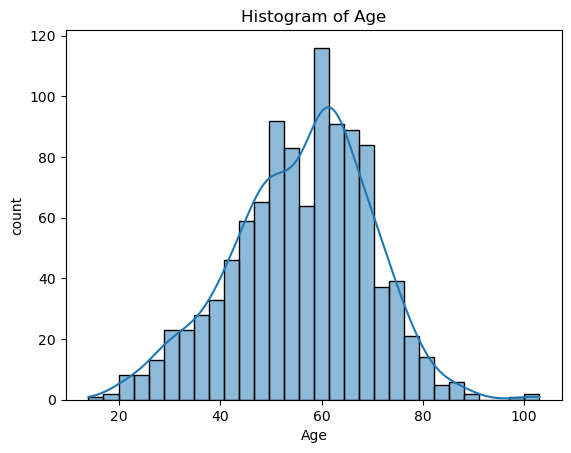

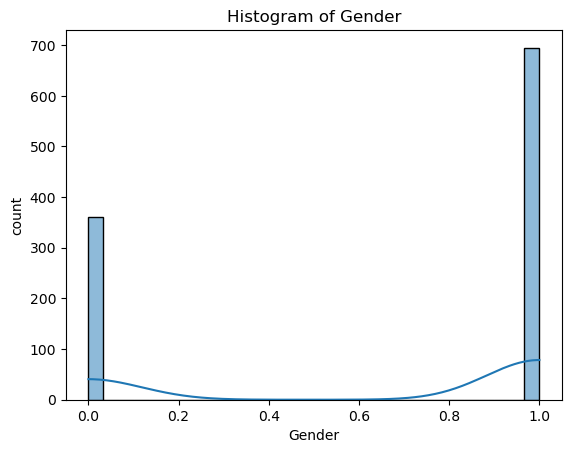

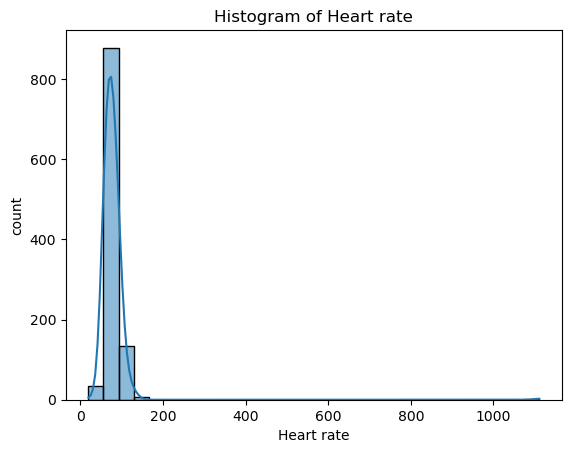

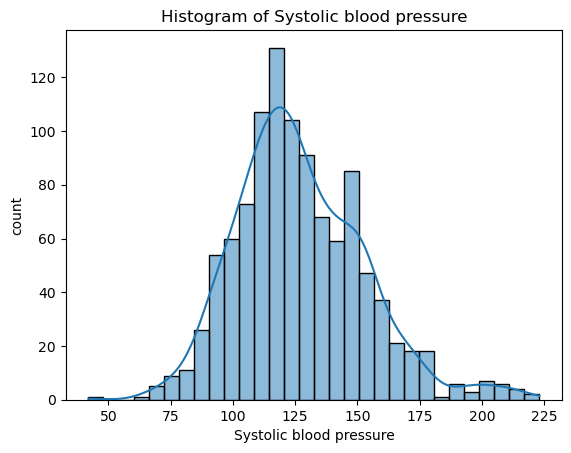

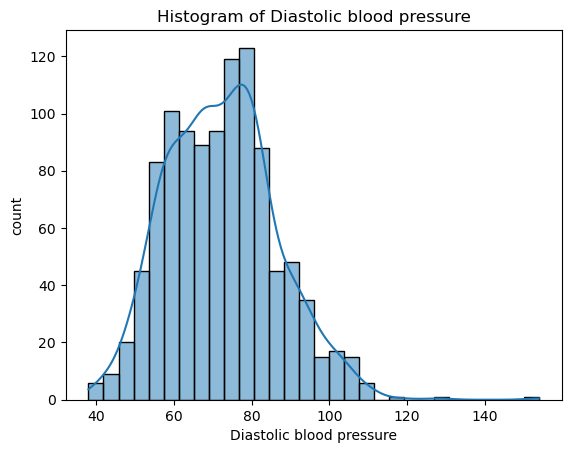

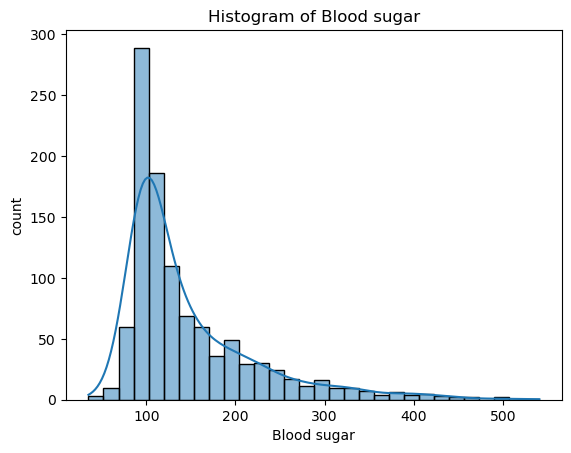

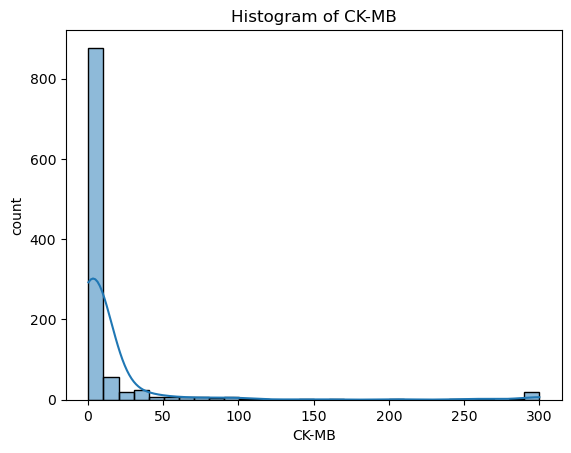

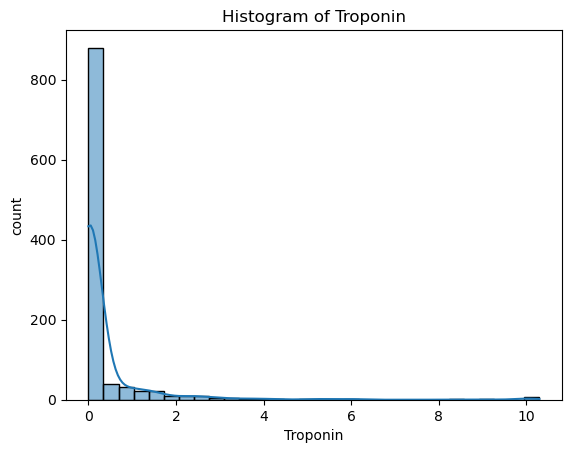

In [70]:
for col in X_train.columns:
    sns.histplot(X_train[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [71]:
trf = ColumnTransformer(
    [('log', FunctionTransformer(np.log1p), X_train.columns)],
    remainder='passthrough'
)

X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

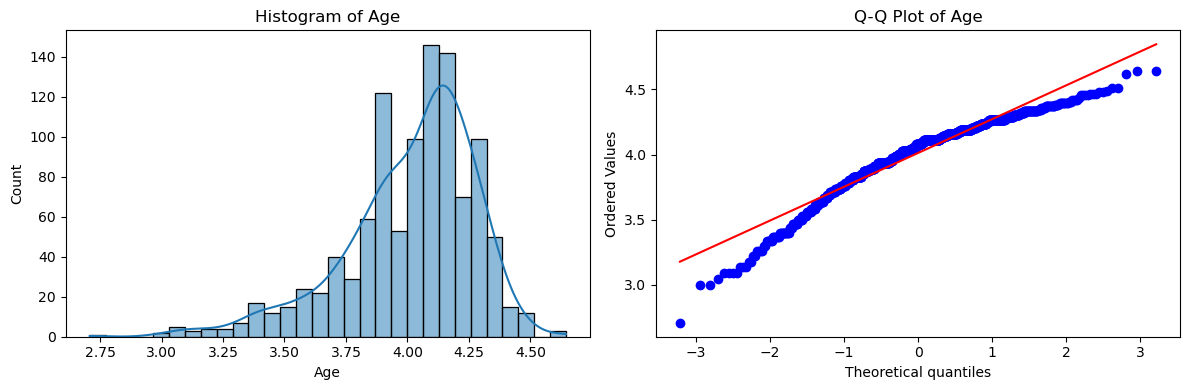

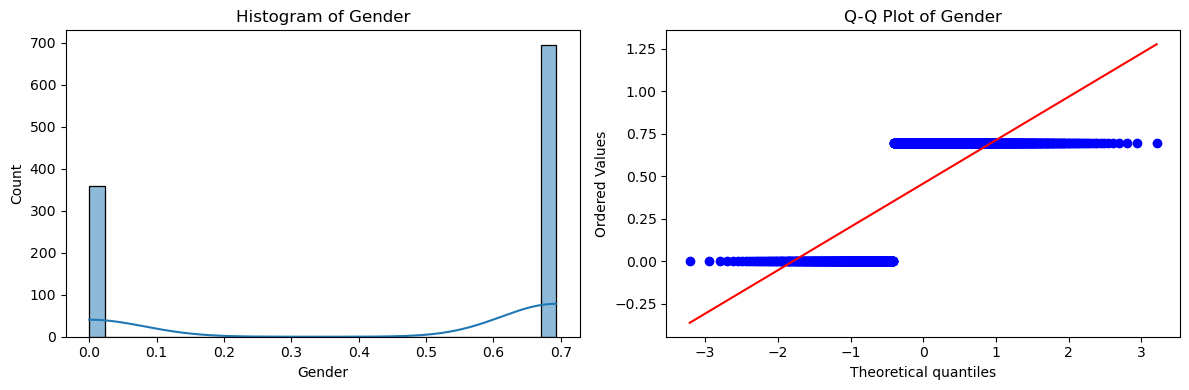

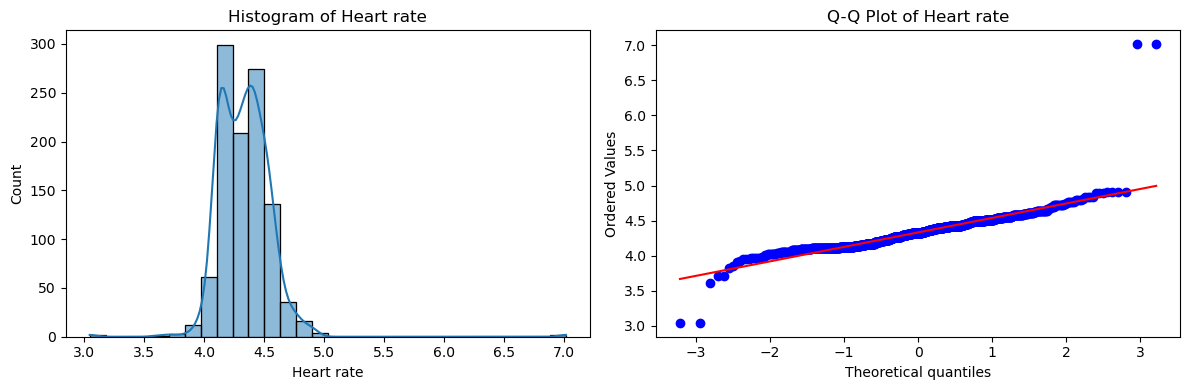

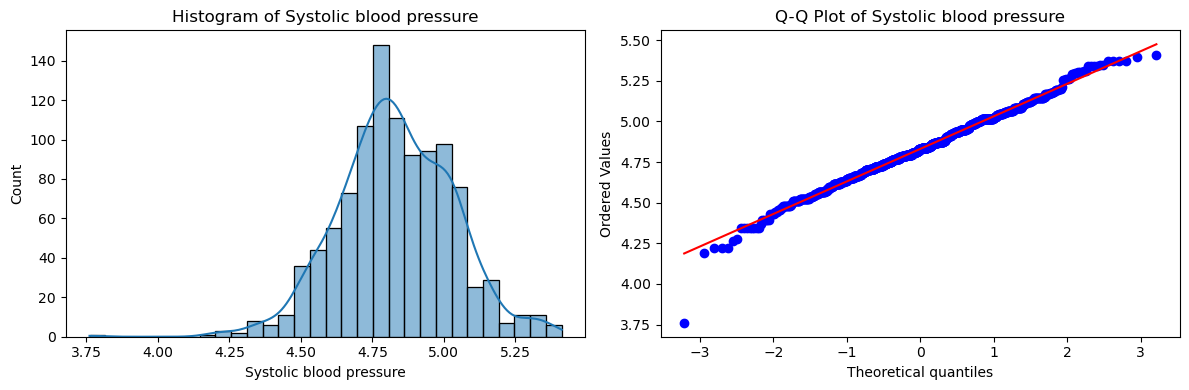

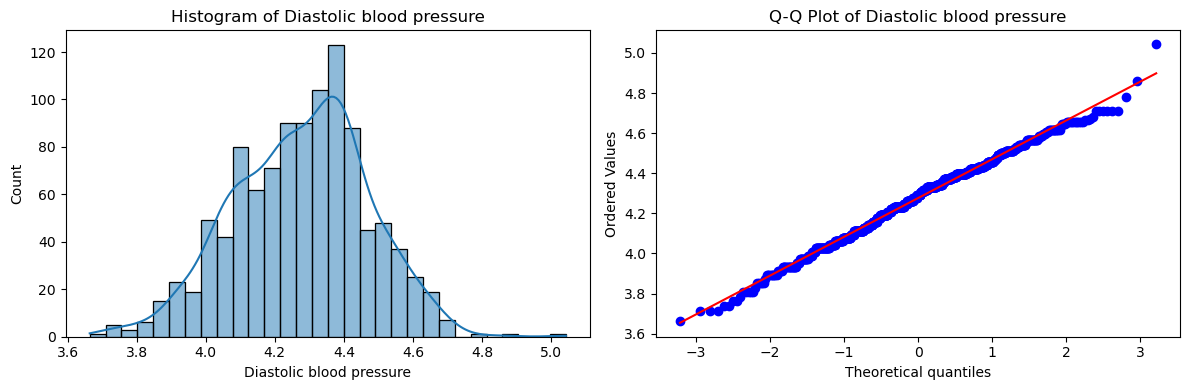

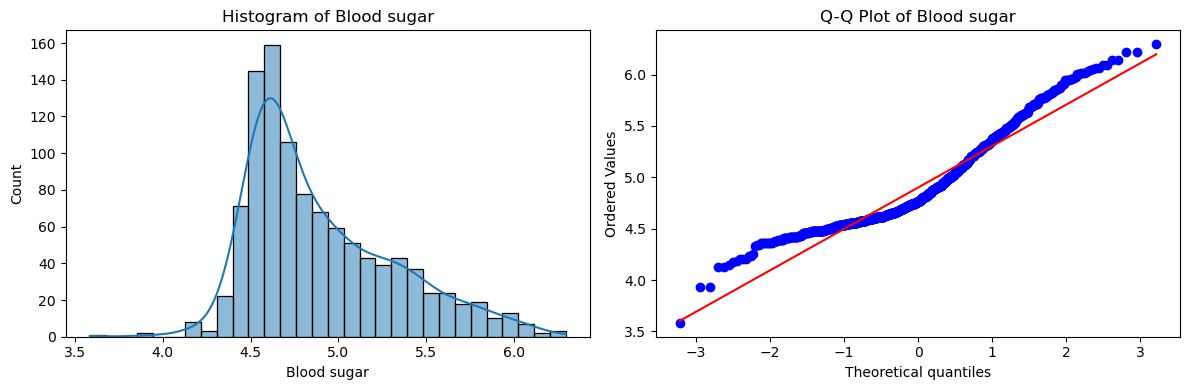

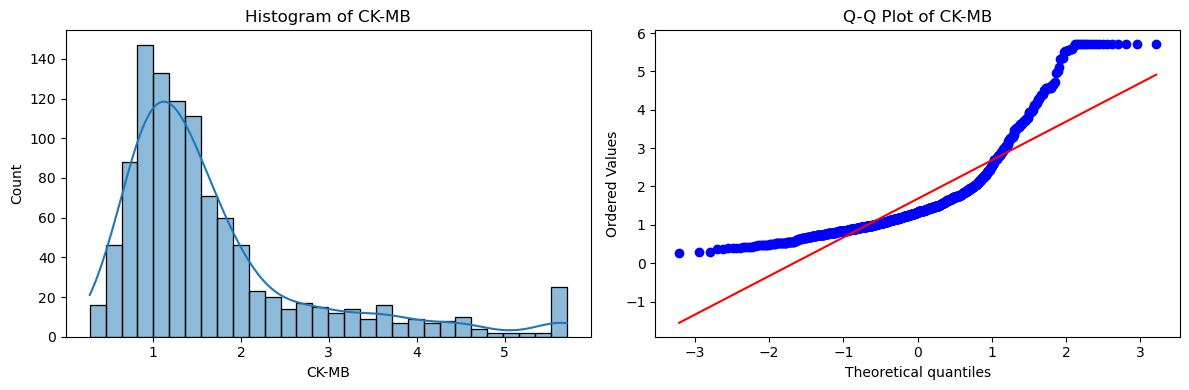

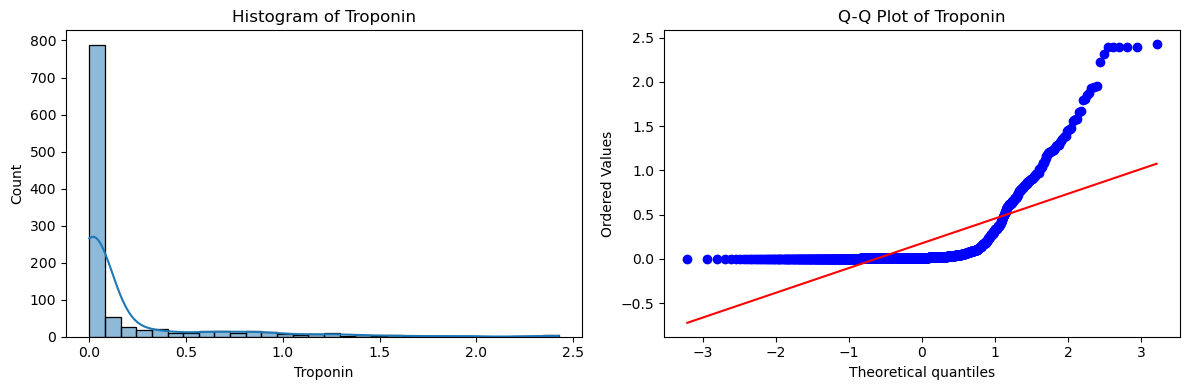

In [72]:
# Convert to DataFrame (if not already)
X_train_df = pd.DataFrame(X_train_transform, columns=X_train.columns)

# Plot histograms and Q-Q plots side by side
for col in X_train_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(X_train_df[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Q-Q Plot
    stats.probplot(X_train_df[col], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

In [73]:
X_train_df['Troponin'].describe()

count    1055.000000
mean        0.176762
std         0.392513
min         0.001000
25%         0.005982
50%         0.013903
75%         0.084341
max         2.424803
Name: Troponin, dtype: float64